<a id="intro"></a>

## 1. Introduction

The main goal of this notebook is to wrangle the data into a format suitable for doing further analysis


<a id="toc"></a>
### Table of Contents

1. [Introduction](#intro)
2. [Setup](#setup)
3. [General](#general)
4. [Cleaning Approach](#cleaning)
5. [ID](#id)
6. [Qtr, Mth](#qm)
7. [Stay Length](#stay)
8. [Visits P3Y, First Time Visitor](#visits)
9. [Categorical Variables](#category)
10. [Multiple Destinations](#multi)
11. [Travel Type](#travel)
12. [Country, POV6a](#country)
13. [Marital Status](#marital)
14. [Carrier](#carrier)
15. [Last Port, Next Port](#lastnextport)
16. [POV](#pov)
17. [Age](#age)
18. [Expenses](#expenses)
19. [Companions](#comp)
20. [Potential Discrepancies](#discrepancies)
21. [Exporting](#export)


<a id="setup"></a>

## Setup

The dataset in question contains historical records of Indonesian visitors in a year 

- case: Unique identifier > renamed to id
- quarter: indicates which quarter of the year did the visitor arrive > renamed to qtr
- R.mth: actual month in which the visitor arrived > renamed to mth
- age: age upon arrival, binned into ranges 
- country: nationality of visitor
- 1st time visitor: whether visitor has been in Singapore before > renamed first_time_visitor
- nbr visit past 3 yrs: amount of times visitor has been to Singapore in the past 3 years > renamed visits_p3y
- mode of arrival: whether the visitor arrived via land, air or sea > renamed arrival_method
- carrier: aircraft line visitor arrived in 
- purpose of visit: stated purpose of visit > renamed pov
- purpose of visit_Grp: stated purpose of visit, general grouping > renamed pov_grp
- pov6a: additional info about purpose of visit 
- Mono-SIN: whether visitor was only visiting Singapore or multiple countries > renamed multi_dest
- Last Port: whether Singapore was the last port for the visitor > renamed last_port
- Next Port: whether there was a next port for the visitor > renamed next_port
- length of stay: amount of days spent in Singapore > renamed stay_length
- Travel Type: whether the visitor was on a travel tour > renamed travel_type
- gender: male or female 
- marital status: married, single, widowed or divorce > renamed married
- companion_1 to companion_6: indicated travelling companions > renamed comp_1 to comp_6
- accomodation (\$): accomodation-related spends during trip > renamed to accom_exp
- shop (\$): shopping-related spends during trip > renamed to shopping_exp
- fnb (\$): fnb-related spends during trip > renamed to fnb_exp
- transport (\$): transport-related spends during trip > renamed to transport_exp
- medical (\$): medical-related spends during trip > renamed to medical_exp
- others (\$): spends during trip not in any of the above categories > renamed to other_exp
- Total: all spends during the trip; sum of \$ variables > renamed to total_exp


[back to top](#toc)

In [1]:
## Importing packages

In [2]:
# Manipulation  
import numpy as np 
import pandas as pd

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

import os

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


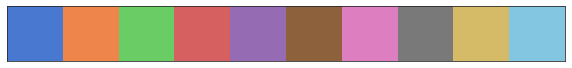

In [3]:
# Set styles 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

%matplotlib inline
sns.set_style('white')
sns.set_palette('muted')

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.size'] = 12

background_color = '#f6f5f5'
col_blue = '#4878d0'
col_orange = '#ee854a'

# Colour palette hex references 
pal = sns.color_palette('muted')
sns.palplot(pal)
print(pal.as_hex())

<a id = 'general'></a>
## General

Notes 
- Examining the shape of the dataset
- Renaming the columns 
- Generating some basic statistics

[back to top](#toc)

In [4]:
# import the dataset
df = pd.read_csv('..\\STB_technical_test\\stbrawdata.csv')

In [5]:
# print out the first few rows
display(df.head(3))
# shape
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

,case,quarter,R.mth,age,country,1st time visitor,nbr visit past 3 yrs,mode of arrival,carrier,purpose of visit,purpose of visit_Grp,pov6a,Mono-SIN,Last Port,Next Port,length of stay,Travel Type,gender,marital status,companion_1,companion_2,companion_3,companion_4,companion_5,companion_6,accomodation ($),shop ($),fnb ($),transport ($),medical ($),others ($),Total
0,4,1,1,30-34 yrs,Indonesia,No,50,Sea,NaN,"Others - Personal (e.g. weddings, funerals, etc)",Leisure,Others/ Refused,Multi-Destination,No,Yes,day tripper,FIT,Male,married,Alone,NaN,NaN,NaN,NaN,NaN,0.00,156.55,6.26,31.30,0.00,0.00,194.12
1,59,1,1,50-54 yrs,Indonesia,No,18,Air,Valuair (VLU),Outpatient consultation/treatment,Healthcare,Healthcare,Mono-SIN,No,No,1.00,FIT,Male,married,Alone,NaN,NaN,NaN,NaN,NaN,231.28,606.55,355.81,160.11,"1,750.00",0.00,"3,103.75"
2,83,1,1,40-44 yrs,Indonesia,No,3,Air,Singapore Airlines Limited (SIA),General business purpose,Business,Business,Mono-SIN,No,No,1.00,FIT,Male,married,Alone,NaN,NaN,NaN,NaN,NaN,996.27,226.55,"1,067.43",355.81,0.00,0.00,"2,646.06"


Dataset has 2952 rows and 32 columns


In [6]:
df.columns
# Original
'''['case', 'quarter', 'R.mth', 'age', 'country', '1st time visitor',
       'nbr visit past 3 yrs', 'mode of arrival', 'carrier',
       'purpose of visit', 'purpose of visit_Grp', 'pov6a', 'Mono-SIN',
       'Last Port', 'Next Port', 'length of stay', 'Travel Type', 'gender',
       'marital status', 'companion_1', 'companion_2', 'companion_3',
       'companion_4', 'companion_5', 'companion_6', 'accomodation ($)',
       'shop ($)', 'fnb ($)', 'transport ($)', 'medical ($)', 'others ($)',
       'Total']'''

"['case', 'quarter', 'R.mth', 'age', 'country', '1st time visitor',\n       'nbr visit past 3 yrs', 'mode of arrival', 'carrier',\n       'purpose of visit', 'purpose of visit_Grp', 'pov6a', 'Mono-SIN',\n       'Last Port', 'Next Port', 'length of stay', 'Travel Type', 'gender',\n       'marital status', 'companion_1', 'companion_2', 'companion_3',\n       'companion_4', 'companion_5', 'companion_6', 'accomodation ($)',\n       'shop ($)', 'fnb ($)', 'transport ($)', 'medical ($)', 'others ($)',\n       'Total']"

In [7]:
# shorten and standardize columns 
df.columns = ['id', 'qtr', 'mth', 'age', 'country', 'first_time_visit',
       'visits_p3y', 'arrival_method', 'carrier',
       'pov', 'pov_grp', 'pov6a', 'multi_dest',
       'last_port', 'next_port', 'stay_length', 'travel_type', 'gender',
       'marital_status', 'comp_1', 'comp_2', 'comp_3',
       'comp_4', 'comp_5', 'comp_6', 'accom_exp',
       'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 'other_exp',
       'total_exp']

In [8]:
# statistics 
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2952 non-null   object 
 1   qtr               2952 non-null   int64  
 2   mth               2952 non-null   int64  
 3   age               2952 non-null   object 
 4   country           2952 non-null   object 
 5   first_time_visit  2952 non-null   object 
 6   visits_p3y        2618 non-null   object 
 7   arrival_method    2952 non-null   object 
 8   carrier           1451 non-null   object 
 9   pov               2952 non-null   object 
 10  pov_grp           2952 non-null   object 
 11  pov6a             2952 non-null   object 
 12  multi_dest        2952 non-null   object 
 13  last_port         2951 non-null   object 
 14  next_port         2951 non-null   object 
 15  stay_length       2952 non-null   object 
 16  travel_type       2952 non-null   object 


,count,mean,std,min,25%,50%,75%,max
qtr,2952.0,2.530488,1.112337,1.0,2.00,3.00,3.00,4.00
mth,2952.0,6.586043,3.548098,1.0,4.00,7.00,9.00,12.00
comp_6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transport_exp,2952.0,41.407720,52.176939,0.0,11.26,25.62,52.17,715.05


In [9]:
# As the dataset is small, we can quickly examine all the unique values for each variable
# for col in df.columns: 
#     print(col, '\n', df[col].unique())
#     print(df[col].value_counts())

<a id='cleaning'></a>
## 4. Cleaning Approach

#### Cleaning the data involves going through the variables and applying the framework of the 4Cs

1. Completing - are there any **missing values**? 
 * Looking out for: missing values, values / variables to drop from the dataset
2. Correcting - are there any values that **look weird**? 
 * To look out for: duplicate / negative values, large outliers, non-numeric values in numeric variables, vice-versa
3. Creating - are there any features that we can **engineer** to help solve our problem?  
 * Looking for: new variables to engineer from existing data 
4. Converting - are all features in the **right dtypes?** 
 * Ensuring that categorical type data and numerical type data are correctly assigned

[back to top](#toc)

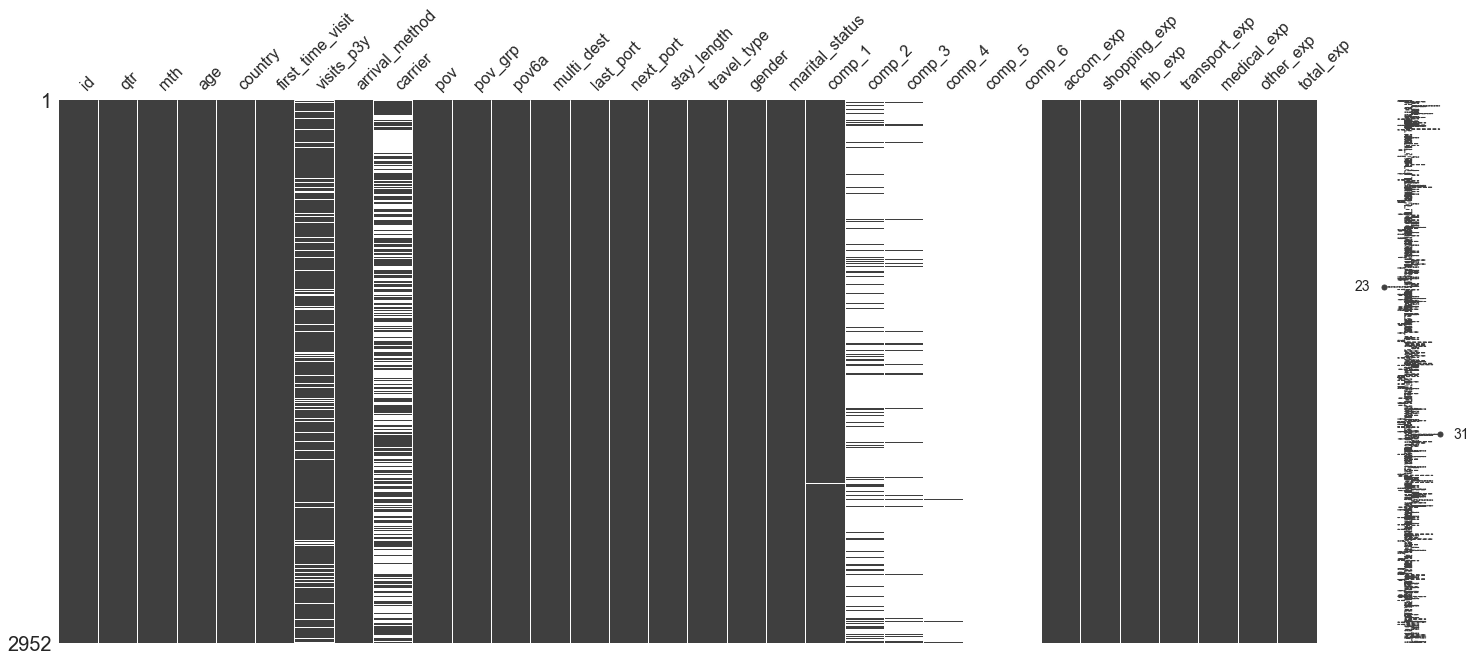

id                     0
qtr                    0
mth                    0
age                    0
country                0
first_time_visit       0
visits_p3y           334
arrival_method         0
carrier             1501
pov                    0
pov_grp                0
pov6a                  0
multi_dest             0
last_port              1
next_port              1
stay_length            0
travel_type            0
gender                 0
marital_status         1
comp_1                 1
comp_2              2508
comp_3              2820
comp_4              2926
comp_5              2945
comp_6              2952
accom_exp              0
shopping_exp           0
fnb_exp                0
transport_exp          0
medical_exp            0
other_exp              0
total_exp              0
dtype: int64
There are 15990 missing values


In [10]:
# check for missing values 
msno.matrix(df)
plt.show()
print(df.isna().sum())
print(f'There are {df.isna().sum().sum()} missing values')

# Variables with missing values: visits_p3y, carrier, last_port, marital_status, companion vars

<a id = 'id'></a>
## ID 

Notes 
- Are all id values unique? 
- Are there any duplicate observations? 
- Are id values in the correct format? > numeric
- Set as index

[back to top](#toc)

In [11]:
# are all id cases unique?  
print(f'Number of duplicated ids: {df["id"].duplicated().sum()}')
print('Number of duplicate records:', 
      df.duplicated(subset = [c for c in df.columns if c != 'id']).sum())

Number of duplicated ids: 0
Number of duplicate records: 0


In [12]:
# test for numeric
# df['id'] = pd.to_numeric(df['id'], errors='raise')
# Unable to parse string 1,027

In [13]:
# Convert id to numeric variable
df['id'] = df['id'].str.replace(',', '')

In [14]:
# convert to int, sample values to check results
df['id'] = df['id'].astype('int32')
display(df['id'].sample(5))

1944    14971
2612    20015
1502    11996
1722    13214
1073     7341
Name: id, dtype: int32

In [15]:
# set id as index
df.set_index('id', drop=True, inplace=True)

<a id = 'qm'></a>
## Qtr and Mth

Notes 
- Are there any values that are out of place? 
- Are time period variables in the correct format? > numeric
- Convert to Months 

[back to top](#toc)

In [16]:
for col in ['qtr', 'mth']: 
    print(col, '\n', df[col].unique())
    print(df[col].value_counts())

# converting to integers, no values that are out of place
df = df.astype({'qtr': 'int32', 
                'mth': 'int32'})

qtr 
 [1 2 3 4]
3    819
4    735
1    723
2    675
Name: qtr, dtype: int64
mth 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
12    356
7     298
1     285
4     283
9     268
8     253
3     220
2     218
6     202
10    196
5     190
11    183
Name: mth, dtype: int64


In [17]:
mth_cat = pd.CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 
                                          'May', 'Jun', 'Jul', 'Aug',
                                          'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
mths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mth_dict = {m+1: mths[m] for m in range(12)}

In [18]:
df['mth'] = df['mth'].map(mth_dict).astype(mth_cat)

<a id = 'stay'></a>
## Stay Length 

Notes 
- Variable should be numeric type - why not? > Err raised "Day tripper"
- Day tripper represents travellers who spend less than a day in SG
- Strategy: replace "Day tripper" with 0, convert variable to integer

[back to top](#toc)

In [19]:
# stay length should be a numeric variable here - why is it not? 
# df['stay_length'] = pd.to_numeric(df['stay_length'], errors = 'raise')
# error returned: cannot convert string value "day tripper"

In [20]:
# convert day tripper to 0 
df.loc[df['stay_length'] == 'day tripper', 'stay_length'] = 0

# check results 
df.loc[df['stay_length'] == 'day tripper']

,qtr,mth,age,country,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,pov6a,multi_dest,last_port,next_port,stay_length,travel_type,gender,marital_status,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
df['stay_length'] = df['stay_length'].map(float).astype('int32')

<a id = 'visits'></a>
## Visits P3Y, First Time Visitor

Notes 
- Variable visits_p3y should be numeric type - why not? > Err raised "Many times"
- Missing values in visits_p3y: 334 NaN values
- Imputation strategy: some first time visitors skipped answering this question
    - Fill in with 0s for first_time_visit answered "yes"
    - For first_time_visit answered "no" + "Many times" respondents, fill in with median of similar age and gender segment

[back to top](#toc)

In [22]:
# identifying na values for visits_p3y
df.loc[df['visits_p3y'].isna()]

# hypothesis: these are first time visitors 
df.loc[df['visits_p3y'].isna(), 'first_time_visit'].value_counts()
# there are 332 "yes" first time visitors and 2 "no" first time visitors 

Yes    332
No       2
Name: first_time_visit, dtype: int64

In [23]:
# test to convert to numeric
# df['visits_p3y'] = pd.to_numeric(df['visits_p3y'], errors='raise')
# error returned: unable to parse string "Many times" > 2 responses

In [24]:
df[df['visits_p3y'] == 'Many times']

,qtr,mth,age,country,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,pov6a,multi_dest,last_port,next_port,stay_length,travel_type,gender,marital_status,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13401,3,Aug,50-54 yrs,Indonesia,No,Many times,Sea,NaN,Holiday/ Rest & Relax,Leisure,Leisure,Mono-SIN,No,No,2,FIT,Female,married,Spouse,NaN,NaN,NaN,NaN,NaN,0.00,176.55,78.85,94.62,0.00,0.00,350.02
13406,3,Aug,30-34 yrs,Indonesia,No,Many times,Sea,NaN,Accompanying a business visitor,Leisure,Accompanying Pax,Mono-SIN,No,No,0,FIT,Male,single,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN,NaN,0.00,146.55,7.89,63.08,0.00,0.00,217.51


In [25]:
# strategy: impute 0 for first time visitors answered "Yes" 
df.loc[(df['first_time_visit'] == 'Yes') 
       & (df['visits_p3y'].isna()), 'visits_p3y'] = 0

# check 
df.loc[(df['first_time_visit'] == 'Yes') 
       & (df['visits_p3y'].isna())]

# 2nd check
df.loc[(df['first_time_visit'] == 'No') 
       & (df['visits_p3y'].isna())]

,qtr,mth,age,country,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,pov6a,multi_dest,last_port,next_port,stay_length,travel_type,gender,marital_status,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10564,2,Jun,45-49 yrs,Indonesia,No,NaN,Air,Lion Airlines (LNI),Outpatient consultation/treatment,Healthcare,Healthcare,Mono-SIN,No,No,3,FIT,Female,married,Children aged 8-12 yrs,NaN,NaN,NaN,NaN,NaN,569.26,638.44,75.90,11.39,"1,166.67",0.00,"2,461.65"
14371,3,Aug,25-29 yrs,Indonesia,No,NaN,Air,Lion Airlines (LNI),Holiday/ Rest & Relax,Leisure,Leisure,Mono-SIN,No,No,4,FIT,Male,single,Alone,NaN,NaN,NaN,NaN,NaN,241.33,326.55,44.69,17.88,0.00,0.00,630.44


In [26]:
# handling 2 records of "Many times": id 13401 and 13406
# strategy is to impute median of similar age and gender demographic
demographic_3034M = df.loc[(df['age'] == '30-34 yrs') 
                           & (df['gender'] == 'Male')
                           & (df['visits_p3y'] != 'Many times')]

demographic_5054M = df.loc[(df['age'] == '50-54 yrs') 
                           & (df['gender'] == 'Male')
                           & (df['visits_p3y'] != 'Many times')]

print('Sample size 30-34M:', demographic_3034M['visits_p3y'].count())
print('30-34M median visits P3Y:', demographic_3034M['visits_p3y'].astype('int32').median())

print('\nSample size 50-54M:', demographic_5054M['visits_p3y'].count())
print('50-54M median visits P3Y:', demographic_5054M['visits_p3y'].astype('int32').median())

# Replace Many times 
df.loc[df['visits_p3y'] == 'Many times', 'visits_p3y'] = 6

# check
print([df.loc[13401, 'visits_p3y'], df.loc[13406, 'visits_p3y']])

Sample size 30-34M: 275
30-34M median visits P3Y: 6.0

Sample size 50-54M: 141
50-54M median visits P3Y: 6.0
[6, 6]


In [27]:
# Moving on to missing values but are non first timers 
# Similar strategy to impute median of similar age and gender demographic
df[df['visits_p3y'].isna()]

# 45-49F and 25-29M, id 10564 and 14371
demographic_4549F = df.loc[(df['age'] == '45-49 yrs') 
                           & (df['gender'] == 'Female')
                           & (df['visits_p3y'].notna())]

demographic_2529M = df.loc[(df['age'] == '25-29 yrs') 
                           & (df['gender'] == 'Male')
                           & (df['visits_p3y'].notna())]

print('\nSample size 45-49M:', demographic_4549F['visits_p3y'].count())
print('45-49M median visits P3Y:', demographic_4549F['visits_p3y'].astype('int32').median())

print('\nSample size 25-29M:', demographic_2529M['visits_p3y'].count())
print('25-29M median visits P3Y:', demographic_2529M['visits_p3y'].astype('int32').median())

# impute with demographic median
df.loc[10564, 'visits_p3y'] = 6
df.loc[14371, 'visits_p3y'] = 4

# check
print('P3Y visits missing values:', df['visits_p3y'].isna().sum())
print([df.loc[10564, 'visits_p3y'], df.loc[14371, 'visits_p3y']])


Sample size 45-49M: 116
45-49M median visits P3Y: 6.0

Sample size 25-29M: 181
25-29M median visits P3Y: 4.0
P3Y visits missing values: 0
[6, 4]


In [28]:
# convert variable to numeric
df['visits_p3y'] = df['visits_p3y'].astype('int32')

<a id = 'category'></a>
## Categorical Variables

Notes
- The following variables have no values that appear out of the ordinary, no missing values, and can be mapped as categorical variables: gender, first_time_visit, arrival_method, pov_grp

[back to top](#toc)

In [29]:
df = df.astype({'gender': 'category', 
                'first_time_visit': 'category',
                'arrival_method': 'category'})

In [30]:
pov_grp = ['Leisure', 'Healthcare', 'Business', 'Education']

pov_grp_map = {i: i[:3] for i in pov_grp}
pov_grp_map

{'Leisure': 'Lei', 'Healthcare': 'Hea', 'Business': 'Bus', 'Education': 'Edu'}

In [31]:
df['pov_grp'] = df['pov_grp'].map(pov_grp_map).astype('category')

<a id = 'multi'></a>
## Multiple Destinations

Notes 
- Variable has one observation where response is "Not Stated"
- Strategy is to impute with the mode

[back to top](#toc)

In [32]:
# Values check
print(df['multi_dest'].unique())
df[df['multi_dest'] == 'Not Stated']
# id 6961

# strategy: fill with the mode 
df.loc[df['multi_dest'] == 'Not Stated', 'multi_dest'] = df['multi_dest'].mode()[0]

# results check
print(df.loc[6_961, 'multi_dest'])
# change to category 
multi_dest_map = {'Multi-Destination': 'Yes', 'Mono-SIN': 'No'}
df['multi_dest'] = df['multi_dest'].map(multi_dest_map).astype('category')

['Multi-Destination' 'Mono-SIN' 'Not Stated']
Mono-SIN


<a id = 'travel'></a>
## Travel Type

Notes 
- Travel type has less than 4% of values that are non FIT 

[back to top](#toc)

In [33]:
print(df['travel_type'].value_counts(normalize=True))

df['travel_type'] = df['travel_type'].astype('category')

FIT    0.966463
F&E    0.018970
Pkg    0.014566
Name: travel_type, dtype: float64


<a id = 'country'></a>
## Country, pov6a

Notes 
- All travellers are from Indonesia, making the country variable redudant, safe to drop
- pov6a does not provide much more information apart from accompanying pax
- strategy: map the pov6a to whether the individual is accompanying or not > drop POV6a

[back to top](#toc)

In [34]:
# dropping country column 
df.drop(columns = ['country'], inplace=True)

In [35]:
print(df['pov6a'].value_counts())
df['accompanying_pax'] = df['pov6a']\
                        .apply(lambda x: 1 if x == 'Accompanying Pax' else 0)\
                        .astype('bool')

# check results
df['accompanying_pax'].value_counts()

Leisure             1723
Business             589
Others/ Refused      229
Healthcare           222
Accompanying Pax     155
Education             34
Name: pov6a, dtype: int64


False    2797
True      155
Name: accompanying_pax, dtype: int64

In [36]:
df.drop(columns = ['pov6a'], inplace=True)

<a id = 'marital'></a>
## Marital Status

Notes 
- One missing value: strategy is to impute with mode
- Group smaller value counts together and rename the column

[back to top](#toc)

In [37]:
df['marital_status'].value_counts()

married     2119
single       813
divorced      11
widowed        8
Name: marital_status, dtype: int64

In [38]:
# id 15545: assign mode 
display(df[df['marital_status'].isna()])
df.loc[15545, 'marital_status'] = df['marital_status'].mode()[0]

# check results
display(df.loc[15545, 'marital_status'])

,qtr,mth,age,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,multi_dest,last_port,next_port,stay_length,travel_type,gender,marital_status,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp,accompanying_pax
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15545,3,Sep,40-44 yrs,No,3,Air,AirAsia Berhad (AXM),Stopover,Lei,No,No,No,0,FIT,Female,NaN,Alone,NaN,NaN,NaN,NaN,NaN,0.00,426.55,178.76,143.01,0.00,0.00,748.32,False


'married'

In [39]:
mar_status_map = {'married': 'Yes', 'single': 'No', 'divorced': 'No', 'widowed': 'No'}

# convert to category 
df['marital_status'] = df['marital_status'].map(mar_status_map).astype('category')
# rename col
df = df.rename(columns = {'marital_status': 'married'})

<a id = 'carrier'></a>
## Carrier

Notes 
- Missing values are from travellers from land / sea transport
- Smaller airlines < 50: grouped under "Otr" category

[back to top](#toc)

In [40]:
# checks: missing values come from land or sea transport 
print('Non air travel and not missing values:', df[(df['arrival_method'] != 'Air') & (df['carrier'].notna())].sum().sum())
print('Air travel and missing values:', df[(df['arrival_method'] == 'Air') & (df['carrier'].isna())].sum().sum())

Non air travel and not missing values: 0.0
Air travel and missing values: 0.0


In [41]:
# filling in the missing values 
df.loc[(df['arrival_method'] == 'Land') & (df['carrier'].isna()), 'carrier'] = 'Land'

df.loc[(df['arrival_method'] == 'Sea') & (df['carrier'].isna()), 'carrier'] = 'Sea'

# check results 
print(f"Missing carrier values: {df['carrier'].isna().sum()}")

Missing carrier values: 0


In [42]:
# create a dataframe of carriers and their frequency counts 
carriers = pd.DataFrame(df['carrier'].value_counts())
carriers

,carrier
Sea,1386
AirAsia Berhad (AXM),392
Garuda Indonesia (GIA),241
Lion Airlines (LNI),221
Singapore Airlines Limited (SIA),149
Land,115
Valuair (VLU),77
Indonesia AirAsia (AWQ),58
Batavia Air (BTV),48
China Airlines Limited (CAL),47


In [43]:
# filter for airlines with less than 50 responses 
smaller_airlines = []

for i, v in zip(carriers.index, carriers['carrier']):
    if v < 50: 
        smaller_airlines.append(i)
print(smaller_airlines)

# check for total responses 
print('Number of responses in smaller airlines:', df['carrier'].isin(smaller_airlines).sum())

['Batavia Air (BTV)', 'China Airlines Limited (CAL)', 'SilkAir (Singapore) Pte Limited (SLK)', 'Jetstar Asia Airways (JSA)', 'Tiger Airways (TGW)', 'Freedom Air', 'Lufthansa German Airlines AG (DLH)', 'Cathay Pacific Airways Limited (CPA)', 'Others', 'Philippine Airlines Inc (PAL)', 'Thai Airways International Public Co Ltd (THA)', 'Malaysia Airlines (MAS)', 'NA/Not Stated', 'United Airlines Inc (UAL)', 'Qantas Airways Limited (QFA)', 'KLM-Royal Dutch Airlines (KLM)', 'Qatar Airways (QTR)', 'Air China International Corporation (CCA)', 'Turkish Airlines (THY)', 'Asiana Airlines (AAR)', 'Delta Airlines (DAL)', 'All Nippon Airways Co Limited (ANA)', 'Myanmar Airways International (UBA)', 'China Eastern Airlines (CES)', 'Cebu Pacific Air (CEB)', 'SriLankan Airlines Limited (ALK)', 'Jetstar Airways International (JST)', 'China Southern Airlines (CSN)', 'Xiamen Airlines (CXA)']
Number of responses in smaller airlines: 313


In [44]:
# map to others
df.loc[df['carrier'].isin(smaller_airlines), 'carrier'] = 'A_Otr'

# results check
print(df['carrier'].value_counts())

# map remaining airlines
carrier_map = {'AirAsia Berhad (AXM)': 'AXM',
               'Valuair (VLU)': 'VLU', 
               'Singapore Airlines Limited (SIA)': 'SIA',
               'Garuda Indonesia (GIA)': 'GIA', 
               'Lion Airlines (LNI)': 'LNI', 
               'Indonesia AirAsia (AWQ)': 'AWQ',
               'Sea': 'Sea', 'A_Otr': 'A_Otr', 'Land': 'Land'}
# assign to category type variable 
df['carrier'] = df['carrier'].map(carrier_map).astype('category')

Sea                                 1386
AirAsia Berhad (AXM)                 392
A_Otr                                313
Garuda Indonesia (GIA)               241
Lion Airlines (LNI)                  221
Singapore Airlines Limited (SIA)     149
Land                                 115
Valuair (VLU)                         77
Indonesia AirAsia (AWQ)               58
Name: carrier, dtype: int64


<a id = 'lastnextport'></a>
## Last Port, Next Port


Notes 
- Only applicable for multi-destination travellers 
- Last port indicates whether SG is the last stop in their journey
- Next port indicates whether there is another destination in the travel itinerary > should be the opposite of last port > redundant 
- To check: are last and next port opposites > 69 discrepancies 
- Strategy: follow direction from indicated last port

[back to top](#toc)

In [45]:
multi_dest = df[df['multi_dest'] == 'Yes']

In [46]:
# check for variables that don't make sense 
last_port = (multi_dest['last_port'] == 'Yes')
next_port = (multi_dest['next_port'] == 'Yes')

# check no.1 > not last port and not next port: 0
multi_dest[~last_port & ~next_port]

# check no.2 > last port and next port: 69 "weird" values 
multi_dest[last_port & next_port]

,qtr,mth,age,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,multi_dest,last_port,next_port,stay_length,travel_type,gender,married,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp,accompanying_pax
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1252,1,Jan,60-64 yrs,No,4,Air,AXM,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Male,Yes,Other relatives,NaN,NaN,NaN,NaN,NaN,213.49,256.55,88.95,15.57,"1,500.00",0.00,"2,074.56",False
1315,1,Jan,30-34 yrs,No,5,Air,A_Otr,General business purpose,Bus,Yes,Yes,Yes,4,FIT,Male,No,Alone,NaN,NaN,NaN,NaN,NaN,889.53,456.55,177.91,35.58,0.00,0.00,"1,559.56",False
1368,1,Jan,60-64 yrs,No,1,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,2,FIT,Female,Yes,Children aged 20-39 yrs,Siblings,Others,NaN,NaN,NaN,227.72,289.89,71.16,29.65,0.00,0.00,618.42,False
1407,1,Jan,30-34 yrs,No,1,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,0,FIT,Male,Yes,Siblings,NaN,NaN,NaN,NaN,NaN,0.00,156.55,17.79,17.79,0.00,0.00,192.13,False
1459,1,Jan,40-44 yrs,No,2,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Spouse,Children aged 8-12 yrs,Children aged 13-19 yrs,NaN,NaN,NaN,71.16,206.55,71.16,35.58,0.00,0.00,384.46,False
1462,1,Jan,35-39 yrs,No,0,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Spouse,Children aged 0-7 yrs,Other relatives,NaN,NaN,NaN,0.00,241.55,20.64,35.58,0.00,0.00,297.77,False
1493,1,Jan,35-39 yrs,Yes,0,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Male,Yes,Spouse,Other relatives,NaN,NaN,NaN,NaN,0.00,216.55,35.58,53.37,0.00,0.00,305.51,False
1584,1,Jan,20-24 yrs,No,1,Land,Land,To experience the food/food events in Singapore,Lei,Yes,Yes,Yes,0,FIT,Female,No,Siblings,Other relatives,NaN,NaN,NaN,NaN,0.00,156.55,3.11,3.11,0.00,0.00,162.78,False
1632,1,Jan,25-29 yrs,Yes,0,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Other relatives,NaN,NaN,NaN,NaN,NaN,0.00,286.55,71.16,24.91,0.00,0.00,382.62,False


In [47]:
# convert to categorical 
df = df.astype({'last_port': 'category', 
                'next_port': 'category'})

<a id = 'pov'></a>
## POV

Notes 
- Group smaller values in the pov group together 
    - Business: 
        - Exhibition/Trade show, Convention/conference, Company sponsored holiday > Others (Business)
    - Education: 
        - In-house company training, Executive training, including training workshops and seminar, Skills development/skills training/vocational training > Professional training
        - School trips, Student enrichment programmes, Study mission > Student enrichment
    - Healthcare: 
        - Outpatient consultation/treatment, In-patient treatment, Day-surgery > Healthcare treatment
    - Leisure: 
        - Visiting an international student studying in Singapore > Visiting friends/relatives
        - Sightseeing/ Attractions, IR (e.g. MBS, RWS), To take or join a reginal or international cruise > Sightseeing/ Attractions
        - rest of the low frequency povs > Others (Leisure)
        
[back to top](#toc)

In [48]:
for pov in ['Bus', 'Edu', 'Hea', 'Lei']: 
    display(df.loc[df['pov_grp'] == pov, 'pov'].value_counts())

General business purpose       492
Corporate/business meetings     82
Exhibition/Trade show            9
Convention/conference            5
Company sponsored holiday        1
Name: pov, dtype: int64

In-house company training                                       17
Study mission                                                    6
Executive training, including training workshops and seminar     6
Skills development/skills training/vocational training           3
Student enrichment programmes                                    1
School trips                                                     1
Name: pov, dtype: int64

Outpatient consultation/treatment    211
In-patient treatment                  10
Day-surgery                            1
Name: pov, dtype: int64

Holiday/ Rest & Relax                                                          776
Visiting friends/relatives                                                     647
Others - Personal (e.g. weddings, funerals, etc)                               172
Accompanying a Healthcare/medical visitor for Outpatient consultation/treat    112
To shop/attend shopping events in Singapore                                    111
Stopover                                                                        72
Others - Work Related (e.g. visa, insurance, etc)                               57
To take or join a reginal or international cruise                               37
Visiting an international student studying in Singapore                         34
Accompanying a business visitor                                                 28
Sightseeing/ Attractions                                                        20
IR (e.g. MBS, RWS)                                                              16
Acco

In [49]:
# creating groupings 
business_others = ['Exhibition/Trade show', 'Convention/conference', 'Company sponsored holiday']

# edu catered to adults
education_a = ['In-house company training', 
                          'Executive training, including training workshops and seminar', 
                          'Skills development/skills training/vocational training']
# edu catered to teens
education_b = ['School trips', 'Student enrichment programmes', 'Study mission']

healthcare_treatment = ['Outpatient consultation/treatment', 
                        'In-patient treatment', 'Day-surgery']

leisure_dict = {'Visiting an international student studying in Singapore': 'Visiting friends/relatives',
                'IR (e.g. MBS, RWS)': 'Sightseeing/ Attractions',
                'To take or join a reginal or international cruise': 'Sightseeing/ Attractions'}

In [50]:
# leisure pov_group
df['pov'] = df['pov'].apply(lambda x: leisure_dict.get(x, x))

In [51]:
low_leisure = []
leisure = df.loc[df['pov_grp'] == 'Lei', 'pov'].value_counts()

for i, v in zip(leisure.keys(), leisure.values):
    if v < 30: 
        low_leisure.append(i)
print(low_leisure)

['Accompanying a business visitor', 'Accompanying a Healthcare/medical visitor for In-patient treatment', 'Gathering informations on the Education services in Singapor', 'Performing Arts', 'Accompaning an international student studying in Singapore', 'To experience the food/food events in Singapore', 'Accompanying a Healthcare/medical visitor for Day surgery', 'Gathering informations on healthcare services in Singapore']


In [52]:
df.loc[df['pov'].isin(low_leisure), 'pov'] = 'Otr_Lei'

# Business pov_group
df.loc[df['pov'].isin(business_others), 'pov'] = 'Otr_Bus'

# Education pov_group
df.loc[df['pov'].isin(education_a), 'pov'] = 'Edu_A'
df.loc[df['pov'].isin(education_b), 'pov'] = 'Edu_B'

# Healthcare pov_group
df.loc[df['pov'].isin(healthcare_treatment), 'pov'] = 'Hea_T'

In [53]:
pov = pd.DataFrame(df['pov'].value_counts())
pov.columns = ['counts']
display(pov)

,counts
Holiday/ Rest & Relax,776
Visiting friends/relatives,681
General business purpose,492
Hea_T,222
"Others - Personal (e.g. weddings, funerals, etc)",172
Accompanying a Healthcare/medical visitor for Outpatient consultation/treat,112
To shop/attend shopping events in Singapore,111
Corporate/business meetings,82
Sightseeing/ Attractions,73
Stopover,72


In [54]:
pov_map = {'Holiday/ Rest & Relax': 'Hol', 
           'Visiting friends/relatives': 'Vis',
           'General business purpose': 'Gen_B', 
           'Hea_T': 'Hea_T',
           'Others - Personal (e.g. weddings, funerals, etc)': 'Otr_Per',
           'Accompanying a Healthcare/medical visitor for Outpatient consultation/treat': 'Acco_Hea',
           'To shop/attend shopping events in Singapore': 'Shop',
           'Corporate/business meetings': 'Bus_Mtg', 
           'Sightseeing/ Attractions': 'Attr', 
           'Stopover': 'Stp',
           'Others - Work Related (e.g. visa, insurance, etc)': 'Otr_Wrk', 
           'Otr_Lei': 'Otr_Lei', 
           'Edu_A': 'Edu_A',
           'Otr_Bus': 'Otr_Bus', 
           'Edu_B': 'Edu_B'}

In [55]:
df['pov'] = df['pov'].map(pov_map)

<a id = 'age'></a>
## Age

Notes 
- Age of respondents are binned into categories 
- Strategy is to map as an ordered categorical variable

[back to top](#toc)

In [56]:
age_map = {'12-14 yrs': '12-14', '15-19 yrs': '15-19', 
           '20-24 yrs': '20-24', '25-29 yrs': '25-29',
           '30-34 yrs': '30-34', '35-39 yrs': '35-39', 
           '40-44 yrs': '40-44', '45-49 yrs': '45-49', 
           '50-54 yrs': '50-54', '55-59 yrs': '55-59',
           '60-64 yrs': '60-64', '65 yrs & above': '>65'}

df['age'] = df['age'].map(age_map)

In [57]:
df['age'].unique()

array(['30-34', '50-54', '40-44', '20-24', '55-59', '45-49', '12-14',
       '35-39', '15-19', '25-29', '60-64', '>65'], dtype=object)

In [58]:
# df['age'].unique()
cat_age = pd.CategoricalDtype(categories = 
                              ['12-14', '15-19', 
                               '20-24', '25-29', 
                               '30-34', '35-39', 
                               '40-44', '45-49', 
                               '50-54', '55-59', 
                               '60-64', '>65'], ordered=True)

df['age'] = df['age'].astype(cat_age)

<a id = 'expenses'></a>
## Expenses

Notes 
- Covers accomodation, shopping, fnb, transport, medical, others and total expenses
- With the exception of transport, all variables are read in as non-numeric because of ',' symbol
- Strategy is to remove ',' symbols and convert expense variables to numeric data types

[back to top](#toc)

In [59]:
expenses = ['accom_exp', 'shopping_exp', 'fnb_exp', 
            'transport_exp', 'medical_exp', 'other_exp', 'total_exp']

for var in expenses:
    df[var] = df[var].replace(',', '', regex=True)
    df[var] = df[var].astype('float32')

In [60]:
# check results
df[expenses].info()
df[expenses].sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 4 to 21962
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   accom_exp      2952 non-null   float32
 1   shopping_exp   2952 non-null   float32
 2   fnb_exp        2952 non-null   float32
 3   transport_exp  2952 non-null   float32
 4   medical_exp    2952 non-null   float32
 5   other_exp      2952 non-null   float32
 6   total_exp      2952 non-null   float32
dtypes: float32(7)
memory usage: 168.3 KB


,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp
id,,,,,,,
3593,0.000000,156.550003,0.000000,32.020000,0.0,0.0,188.580002
12775,0.000000,126.550003,0.000000,39.430000,0.0,0.0,165.970001
18987,0.000000,125.160004,14.530000,7.270000,0.0,0.0,146.960007
17410,0.000000,125.160004,100.680000,167.789993,0.0,0.0,393.630005
20802,0.000000,145.160004,134.229996,16.780001,0.0,0.0,296.179993
18850,0.000000,125.160004,67.120003,16.780001,0.0,0.0,209.059998
17477,0.000000,125.160004,17.440001,37.779999,0.0,0.0,180.380005
18534,0.000000,175.160004,51.900002,0.000000,0.0,0.0,227.059998
2587,160.110001,306.549988,177.910004,71.160004,1500.0,0.0,2215.729980


In [61]:
# create avg expenses per day > set daytrippers = 1 to prevent div0 error
days_sg = df['stay_length'].apply(lambda x: 1 if x == 0 else x)

In [62]:
df['avg_exp'] = df['total_exp']/days_sg

<a id = 'comp'></a>
## Companions - comp_1 to comp_6

Notes 
- Join companion columns together
- Strategy: create new variables > comp_alone, comp_colleagues, comp_partner, comp_friends, comp_family, comp_children

[back to top](#toc)

In [63]:
comps = ['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6']

In [64]:
# join the companions together
df['companions'] = df[comps].values.tolist()

# remove Nans
df['companions'] = df['companions'].apply(lambda x:[e for e in x if not pd.isnull(e)])

In [65]:
# drop comps 
df.drop(columns=comps, inplace=True)

In [66]:
# create a new variable joining the list elements 
df['companions_total'] = [', '.join(l) for l in df['companions']]

In [67]:
# map to travelling companions
df['comp_alone'] = df['companions_total'].str.contains('Alone')
df['comp_colleagues'] = df['companions_total'].str.contains(r'(Colleagues|Business)')
df['comp_partner'] = df['companions_total'].str.contains(r'(Spouse|Partner|Boyfriend|Girlfriend)')
df['comp_friends'] = df['companions_total'].str.contains(r'(Friends)')
df['comp_family'] = df['companions_total'].str.contains(r'(Siblings|Parents|Grandparents|relatives)')
df['comp_children'] = df['companions_total'].str.contains(r'(Children)')

<a id = 'discrepancies'></a>
## Potential discrepancies 

Notes
- Land arrivals + only visiting SG? 
- SG being the last port, but having a next port as well? 

[back to top](#toc)

In [68]:
# 4 values 
df[(df['arrival_method'] == 'Land') & (df['multi_dest'] == 'No')]

,qtr,mth,age,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,multi_dest,last_port,next_port,stay_length,travel_type,gender,married,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp,accompanying_pax,avg_exp,companions,companions_total,comp_alone,comp_colleagues,comp_partner,comp_friends,comp_family,comp_children
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1933,1,Feb,30-34,No,36,Land,Land,Otr_Per,Lei,No,No,No,0,FIT,Male,Yes,0.00,156.550003,35.580002,17.790001,0.0,0.0,209.919998,False,209.919998,[Alone],Alone,True,False,False,False,False,False
5177,2,Apr,50-54,Yes,0,Land,Land,Hol,Lei,No,No,No,0,FIT,Male,Yes,0.00,143.440002,17.080000,17.080000,0.0,0.0,177.589996,False,177.589996,[Spouse],Spouse,False,False,True,False,False,False
7590,2,May,25-29,No,20,Land,Land,Gen_B,Bus,No,No,No,0,FIT,Male,No,0.00,141.440002,8.540000,0.000000,0.0,0.0,149.970001,False,149.970001,[Alone],Alone,True,False,False,False,False,False
12654,3,Jul,25-29,No,25,Land,Land,Edu_A,Edu,No,No,No,3,FIT,Male,Yes,664.75,126.550003,11.920000,17.879999,0.0,0.0,821.090027,False,273.696676,[Alone],Alone,True,False,False,False,False,False


In [69]:
# last port AND next port: 69 "weird" values 
multi_dest[last_port & next_port]

,qtr,mth,age,first_time_visit,visits_p3y,arrival_method,carrier,pov,pov_grp,multi_dest,last_port,next_port,stay_length,travel_type,gender,married,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,accom_exp,shopping_exp,fnb_exp,transport_exp,medical_exp,other_exp,total_exp,accompanying_pax
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1252,1,Jan,60-64 yrs,No,4,Air,AXM,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Male,Yes,Other relatives,NaN,NaN,NaN,NaN,NaN,213.49,256.55,88.95,15.57,"1,500.00",0.00,"2,074.56",False
1315,1,Jan,30-34 yrs,No,5,Air,A_Otr,General business purpose,Bus,Yes,Yes,Yes,4,FIT,Male,No,Alone,NaN,NaN,NaN,NaN,NaN,889.53,456.55,177.91,35.58,0.00,0.00,"1,559.56",False
1368,1,Jan,60-64 yrs,No,1,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,2,FIT,Female,Yes,Children aged 20-39 yrs,Siblings,Others,NaN,NaN,NaN,227.72,289.89,71.16,29.65,0.00,0.00,618.42,False
1407,1,Jan,30-34 yrs,No,1,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,0,FIT,Male,Yes,Siblings,NaN,NaN,NaN,NaN,NaN,0.00,156.55,17.79,17.79,0.00,0.00,192.13,False
1459,1,Jan,40-44 yrs,No,2,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Spouse,Children aged 8-12 yrs,Children aged 13-19 yrs,NaN,NaN,NaN,71.16,206.55,71.16,35.58,0.00,0.00,384.46,False
1462,1,Jan,35-39 yrs,No,0,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Spouse,Children aged 0-7 yrs,Other relatives,NaN,NaN,NaN,0.00,241.55,20.64,35.58,0.00,0.00,297.77,False
1493,1,Jan,35-39 yrs,Yes,0,Land,Land,Holiday/ Rest & Relax,Lei,Yes,Yes,Yes,1,FIT,Male,Yes,Spouse,Other relatives,NaN,NaN,NaN,NaN,0.00,216.55,35.58,53.37,0.00,0.00,305.51,False
1584,1,Jan,20-24 yrs,No,1,Land,Land,To experience the food/food events in Singapore,Lei,Yes,Yes,Yes,0,FIT,Female,No,Siblings,Other relatives,NaN,NaN,NaN,NaN,0.00,156.55,3.11,3.11,0.00,0.00,162.78,False
1632,1,Jan,25-29 yrs,Yes,0,Land,Land,Visiting friends/relatives,Lei,Yes,Yes,Yes,1,FIT,Female,Yes,Other relatives,NaN,NaN,NaN,NaN,NaN,0.00,286.55,71.16,24.91,0.00,0.00,382.62,False


<a id = 'export'></a>
## Exporting  

Notes 
- Conduct final checks and export the csv 

[back to top](#toc)

In [70]:
print(df.columns)

Index(['qtr', 'mth', 'age', 'first_time_visit', 'visits_p3y', 'arrival_method',
       'carrier', 'pov', 'pov_grp', 'multi_dest', 'last_port', 'next_port',
       'stay_length', 'travel_type', 'gender', 'married', 'accom_exp',
       'shopping_exp', 'fnb_exp', 'transport_exp', 'medical_exp', 'other_exp',
       'total_exp', 'accompanying_pax', 'avg_exp', 'companions',
       'companions_total', 'comp_alone', 'comp_colleagues', 'comp_partner',
       'comp_friends', 'comp_family', 'comp_children'],
      dtype='object')


In [71]:
col_dtypes = df.reset_index().dtypes.to_frame('dtypes').reset_index()
col_dtypes

,index,dtypes
0,id,int64
1,qtr,int32
2,mth,category
3,age,category
4,first_time_visit,category
5,visits_p3y,int32
6,arrival_method,category
7,carrier,category
8,pov,object
9,pov_grp,category


In [72]:
# final check
df.dtypes.tolist()

[dtype('int32'),
 CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                   'Sep', 'Oct', 'Nov', 'Dec'],
 , ordered=True),
 CategoricalDtype(categories=['12-14', '15-19', '20-24', '25-29', '30-34', '35-39',
                   '40-44', '45-49', '50-54', '55-59', '60-64', '>65'],
 , ordered=True),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 dtype('int32'),
 CategoricalDtype(categories=['Air', 'Land', 'Sea'], ordered=False),
 CategoricalDtype(categories=['AWQ', 'AXM', 'A_Otr', 'GIA', 'LNI', 'Land', 'SIA', 'Sea',
                   'VLU'],
 , ordered=False),
 dtype('O'),
 CategoricalDtype(categories=['Bus', 'Edu', 'Hea', 'Lei'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False),
 dtype('int32'),
 CategoricalDtype(categories=['F&E', 'FIT', 'Pkg'], ordered=False),
 CategoricalDtype(categ

In [73]:
df = df.reset_index()
# export save point
df.to_csv('..\\STB_technical_test\\stbcleaned.csv', index=False)